In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [0]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

In [0]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

In [0]:
# summarize the data
df.describe()

In [0]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
adf = df['ENGINESIZE']
#cdf.head(9)
print(cdf)

In [0]:
viz = df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

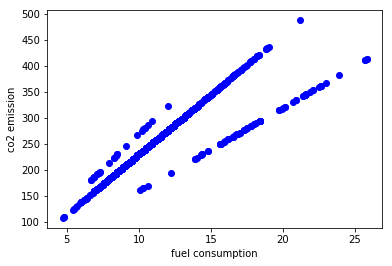

In [0]:
plt.scatter(cdf['FUELCONSUMPTION_COMB'], cdf.CO2EMISSIONS, color="blue")
plt.xlabel('fuel consumption')
plt.ylabel('co2 emission')
plt.show()

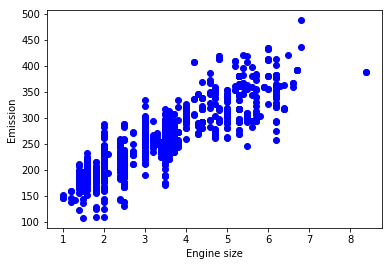

In [0]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

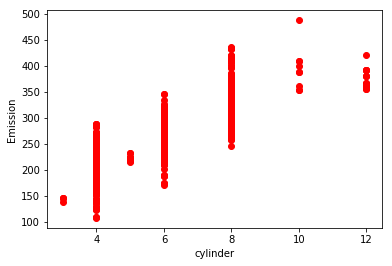

In [0]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,  color='red')
plt.xlabel('cylinder')
plt.ylabel('Emission')
plt.show()

In [0]:
msk = np.random.rand(len(df)) <0.8
train = cdf[msk]
test = cdf[~msk]

In [0]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.19136528]]
Intercept:  [125.59752002]


Text(0, 0.5, 'Emission')

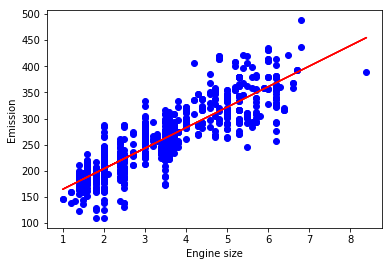

In [0]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [0]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean Error %.2lf" % np.mean(np.absolute(test_y_ - test_y)))
#print("Mean Squared Error %.2lf" % np.mean((test_y_ - test_y) ** 2))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2 score %.2lf" % r2_score(test_y_ , test_y))


Mean Error 22.62
Residual sum of squares (MSE): 853.81
R2 score 0.68
